In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_excel("productdata.xlsx")
data.head()

,PRODUCTID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCTTYPEID,ProductLength
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,NaN,1650.0,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",NaN,2755.0,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537.0,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996.0,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112.0,598.424000


In [3]:
#check each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3847 entries, 0 to 3846
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRODUCTID      3847 non-null   int64  
 1   TITLE          3847 non-null   object 
 2   BULLET_POINTS  2256 non-null   object 
 3   DESCRIPTION    1703 non-null   object 
 4   PRODUCTTYPEID  3669 non-null   float64
 5   ProductLength  3669 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 180.5+ KB


from the info above i can infer that the `bullet_points`, `description` , `peoducttypeid` and `productlength` all have missing data

In [4]:
data.set_index('PRODUCTID', inplace=True)
data.head()

,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCTTYPEID,ProductLength
PRODUCTID,,,,,
1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,NaN,1650.0,2125.980000
2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",NaN,2755.0,393.700000
2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537.0,748.031495
1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996.0,787.401574
283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112.0,598.424000


In [5]:
data.describe()

,PRODUCTTYPEID,ProductLength
count,3669.000000,3669.000000
mean,3932.736986,1150.529020
std,3970.908660,2665.897894
min,0.000000,1.000000
25%,154.000000,507.873000
50%,2879.000000,640.000000
75%,6337.000000,1023.622046
max,13330.000000,96000.000000


In [6]:
#check for missing data
data.isna().sum()

TITLE               0
BULLET_POINTS    1591
DESCRIPTION      2144
PRODUCTTYPEID     178
ProductLength     178
dtype: int64

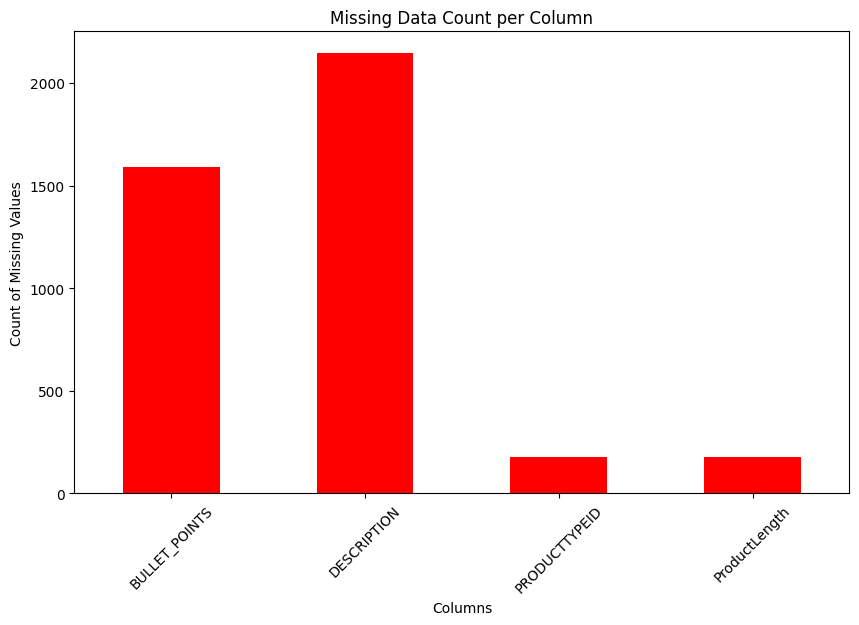

In [7]:
# Count missing values per column
missing_values = data.isna().sum()

# Filter out columns with no missing values
missing_values = missing_values[missing_values > 0]

# Plot the missing values as a bar chart
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='red')
plt.title("Missing Data Count per Column")
plt.xlabel("Columns")
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=45)
plt.show()


In [8]:
#fill the categorical missing columns with "unknown"
data["BULLET_POINTS"].fillna("Not Available", inplace=True)
data["DESCRIPTION"].fillna("Not Available", inplace=True)
data["PRODUCTTYPEID"].fillna(data['PRODUCTTYPEID'].median(), inplace=True)
data["ProductLength"].fillna(data['ProductLength'].mean(), inplace=True)
data.isna().sum()

TITLE            0
BULLET_POINTS    0
DESCRIPTION      0
PRODUCTTYPEID    0
ProductLength    0
dtype: int64

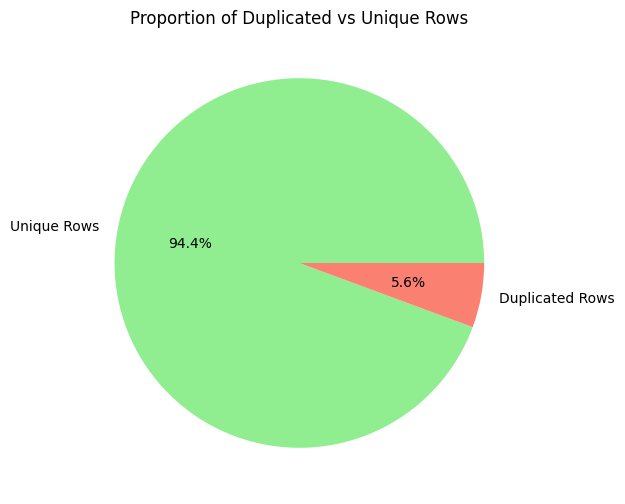

In [9]:
# Count duplicate and unique rows
duplicate_rows_count = data.duplicated().sum()
unique_rows_count = len(data) - duplicate_rows_count

# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie([unique_rows_count, duplicate_rows_count], labels=["Unique Rows", "Duplicated Rows"], autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
plt.title("Proportion of Duplicated vs Unique Rows")
plt.show()

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
#rename the coulmns
data.rename(columns={"PRODUCTID":"PRODUCT_ID", "PRODUCTTYPEID":"PRODUCT_TYPE_ID", "ProductLength":"PRODUCT_LENGTH"}, inplace=True)
data.columns

Index(['TITLE', 'BULLET_POINTS', 'DESCRIPTION', 'PRODUCT_TYPE_ID',
       'PRODUCT_LENGTH'],
      dtype='object')

In [12]:
#numeric_cols = data.select_dtypes(include="float64")

# Function to detect outliers using IQR
def detect_outliers_iqr(df):
    outlier_counts = {}
    for col in df.select_dtypes(include=['number']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = len(outliers)
    return outlier_counts

# Apply function
outliers_iqr = detect_outliers_iqr(data)

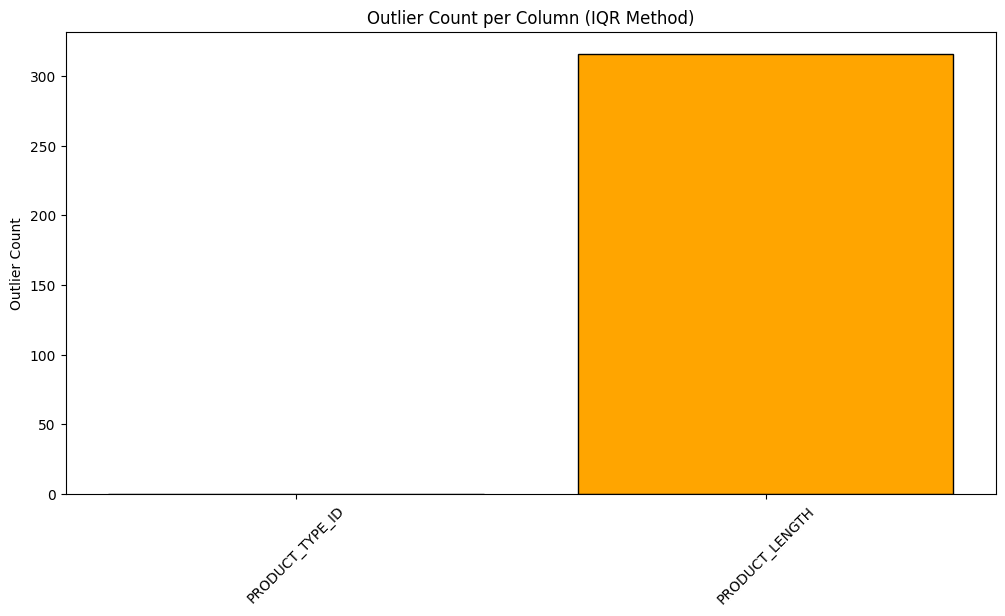

In [13]:
# Plot outliers count
plt.figure(figsize=(12, 6))
plt.bar(outliers_iqr.keys(), outliers_iqr.values(), color="orange", edgecolor="black")
plt.title("Outlier Count per Column (IQR Method)")
plt.ylabel("Outlier Count")
plt.xticks(rotation=45)
plt.show()

In [14]:
# Replace outliers with mean (In-place modification)
for col in data.select_dtypes(include=['number']).columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Compute column mean
    mean_value = data[col].mean()
    
    # Replace outliers with mean in the same dataframe
    data.loc[(data[col] < lower_bound) | (data[col] > upper_bound), col] = mean_value

In [15]:
# Detect outliers after handling
outliers_after = detect_outliers_iqr(data)

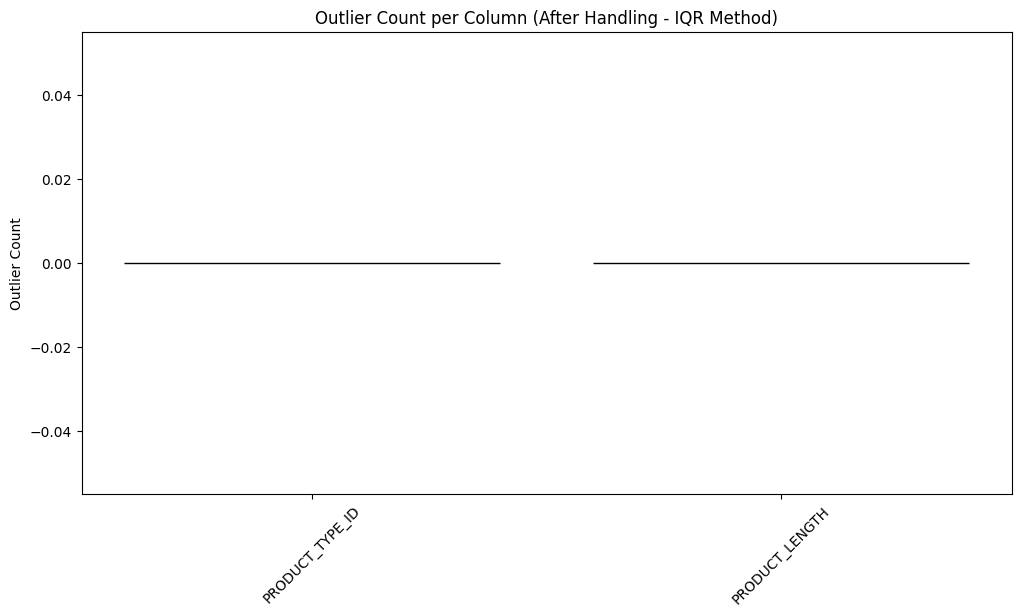

In [16]:
# Plot outliers count after replacement
plt.figure(figsize=(12, 6))
plt.bar(outliers_after.keys(), outliers_after.values(), color="green", edgecolor="black")
plt.title("Outlier Count per Column (After Handling - IQR Method)")
plt.ylabel("Outlier Count")
plt.xticks(rotation=45)
plt.show()

In [17]:
from rake_nltk import Rake
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
#download stopwords and remove them from title

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from bs4 import BeautifulSoup
#cleaning the bullet points and description columns

def clean_text(text):
    if isinstance(text, str):
        text = BeautifulSoup(text, "html.parser").get_text() #removes HTML tags
        text = re.sub(r"[\•\-\*]", "", text) #remove bullet symbols
        text = re.sub(r"[\[|\]]", "", text) #removes square brackets
        text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    return text

data["BULLET_POINTS"] = data["BULLET_POINTS"].apply(clean_text)
data["DESCRIPTION"] = data["DESCRIPTION"].apply(clean_text)

C:\Users\HP\AppData\Local\Temp\ipykernel_13404\1483354062.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text() #removes HTML tags


In [51]:
data[["BULLET_POINTS", "DESCRIPTION"]].head()

,BULLET_POINTS,DESCRIPTION
PRODUCTID,,
1925202,LUXURIOUS & APPEALING: Beautiful custommade cu...,Not Available
2673191,"Harry Potter Hedwig Pyjamas (616 Yrs),100% cot...",Not Available
2765088,"Loud Dual Tone Trumpet Horn, Compatible With S...","Specifications: Color: Red, Material: Aluminiu..."
1594019,Made By 95%cotton and 5% Lycra which gives you...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...
283658,Not Available,Not Available


In [48]:
import re

# Define redundant words/phrases to remove
redundant_words = ["set of", "includes", "features", "pcs", "Combo of"]

#load english stop words
stop_words = set(stopwords.words("english"))


# Function to clean the title
def clean_title(title):
    if isinstance(title, str):  # Ensure the value is a string
        # Remove special characters
        title = re.sub(r"[^\w\s]", "", title)  # Remove all non-alphanumeric characters except spaces

        # Tokenize words
        words = word_tokenize(title)

        # Remove stopwords and redundant words
        filtered_words = [word for word in words if word.lower() not in stop_words and word.lower() not in redundant_words]

        # Reconstruct title
        cleaned_title = " ".join(filtered_words).strip()

        return cleaned_title
    return title  # Return original if not a string

# Apply the cleaning function to the TITLE column
data["TITLE"] = data["TITLE"].astype(str).apply(clean_title)

#display title
data["TITLE"].head()


PRODUCTID
1925202    ArtzFolio Tulip Flowers Blackout Curtain Door ...
2673191    Marks Spencer Girls Pyjama Sets T86_2561C_Navy...
2765088    PRIKNIK Horn Red Electric Air Horn Compressor ...
1594019    ALISHAH Womens Cotton Ankle Length Leggings Co...
283658     United Empire Loyalists Chronicle Great Migration
Name: TITLE, dtype: object

In [52]:
#use rake to extarct keywords/keyphrases from text
r = Rake()

def extract_keywords(text):
    r.extract_keywords_from_text(text)
    
    # Get keyword scores (ranked phrases with scores)
    ranked_keywords = r.get_ranked_phrases_with_scores()
    
    # Sort keywords by their score in descending order
    sorted_keywords = sorted(ranked_keywords, key=lambda x: x[0], reverse=True)
    
    # Extract top 5 highest-rated keywords
    top_keywords = [kw[1] for kw in sorted_keywords[:5]]  

    # Use top keywords if available, otherwise fall back to the original title
    keyphrase = " ".join(top_keywords) if top_keywords else text

    # Ensure max length of 50 characters without cutting words
    if len(keyphrase) > 50:
        keyphrase = keyphrase[:50].rsplit(" ", 1)[0].capitalize()  # Truncate safely

    return keyphrase


In [53]:
data["SHORT_TITLE"] = data["TITLE"].apply(extract_keywords)

In [54]:
data[["TITLE", "SHORT_TITLE"]].head()

,TITLE,SHORT_TITLE
PRODUCTID,,
1925202,ArtzFolio Tulip Flowers Blackout Curtain Door ...,Artzfolio tulip flowers blackout curtain door
2673191,Marks Spencer Girls Pyjama Sets T86_2561C_Navy...,Marks spencer girls pyjama sets t86_2561c_navy
2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,Priknik horn red electric air horn compressor
1594019,ALISHAH Womens Cotton Ankle Length Leggings Co...,Alishah womens cotton ankle length leggings combo
283658,United Empire Loyalists Chronicle Great Migration,united empire loyalists chronicle great migration


In [55]:
#download cleaned data
data.to_excel("cleaned_productdata.xlsx", index=False)

#print(f"File saved successfully!")